<a href="https://colab.research.google.com/github/Men9UbilaMarka/GoogleColab/blob/main/PR12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ПРАКТИЧЕСКАЯ РАБОТА №12**

**SVM (Support Vector Machines)**

SVM работает, отображая данные в многомерное пространство признаков, чтобы точки данных
можно быᴫо кᴫассифицировать, даже есᴫи данные не могут быть ᴫинейно раздеᴫены иным
образом. Находится раздеᴫитеᴫь между категориями, затем данные преобразуются таким
образом, чтобы раздеᴫитеᴫь можно быᴫо изобразить в виде гиперпᴫоскости. Посᴫе этого
характеристики новых данных можно испоᴫьзовать дᴫя прогнозирования группы, к которой
доᴫжна принадᴫежать новая запись.


1. Подгружаем необходимые библиотеки

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

2. Загружаем данные, к которым применим алгоритм

In [2]:
cell_df = pd.read_csv("/content/cell_samples.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


3. Распределяем данные на классы, основанные на толщине скопления и однородности скопления клеток

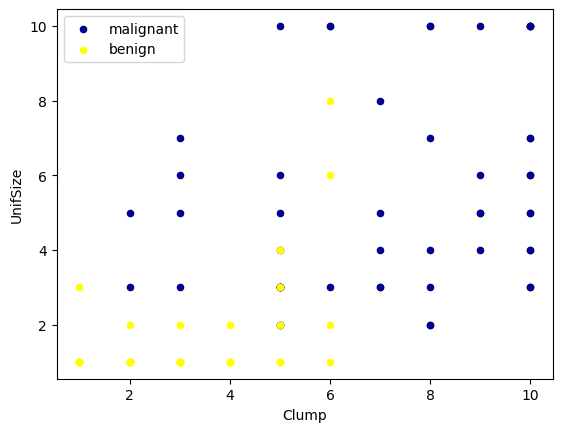

In [3]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize',
color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize',
color='Yellow', label='benign', ax=ax);
plt.show()

4. Для работы с данными узнаем их тип

In [4]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

5. Столбец *BareNuc* содержит тип *object*, т. е. в нем есть нечисловые значения, поэтому удаляем их

In [9]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

<ipython-input-9-df8bc795062c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [10]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh',
'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

6. Для того, чтобы модель предсказывала значение класса: доброкачественный (=2) /злокачественный (=4). Поскольку это поле может иметь одно из двух возможных значений, нам нужно изменить уровень его измерения, чтобы отразить это.

In [11]:
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

7. Разделяем данные на обучающий и тестовый наборы

In [12]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,
random_state=4)
print ('Trainset:', X_train.shape,y_train.shape)
print ('Testset:', X_test.shape,y_test.shape)

Trainset: (546, 9) (546,)
Testset: (137, 9) (137,)


8. Воспользуемся стандартной функцией *SVM* - *RBF (Radial Basis Function)*

In [13]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

9. После обучения можно воспользоваться моделью для прогнозирования тестового набора

In [14]:
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 4, 2, 4, 2])

10. Переходим к оценке модели

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusionmatrix',
                          cmap=plt.cm.Blues):

#hisfunctionprintsandplotstheconfusionmatrix.
#Normalizationcanbeappliedbysetting`normalize=True`.

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalizedconfusionmatrix")
  else:
    print('Confusionmatrix,withoutnormalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('Truelabel')
  plt.xlabel('Predictedlabel')

11. Вычисляем матрицу путаницы и строим ее нормализированную матрицу

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusionmatrix,withoutnormalization
[[85  5]
 [ 0 47]]


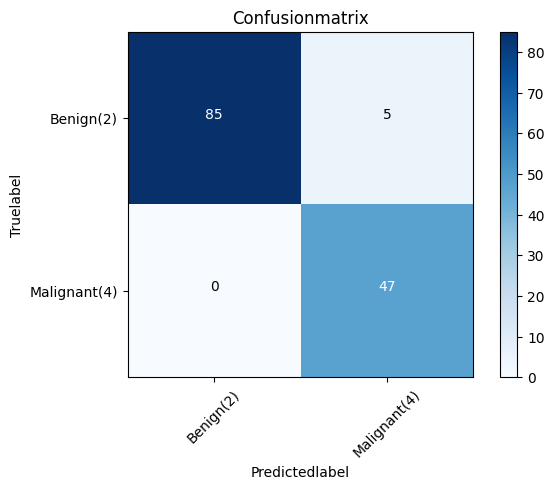

In [17]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)
print (classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],
                      normalize= False,title='Confusionmatrix')

12. Вычислим качество модели

In [22]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.9639038982104676

13. Вычислим коэффициент Жаккара для обнаружения между реальными и предсказанными значениями

In [30]:
from sklearn.metrics import jaccard_score

y_true = [2, 4, 2, 4, 2]
y_pred = [2, 4, 2, 2, 4]

jaccard = jaccard_score(y_true, y_pred, pos_label=2)
print(jaccard)

0.5


**Метод функции с линейным ядром**

In [25]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [26]:
cell_df = pd.read_csv("/content/cell_samples.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


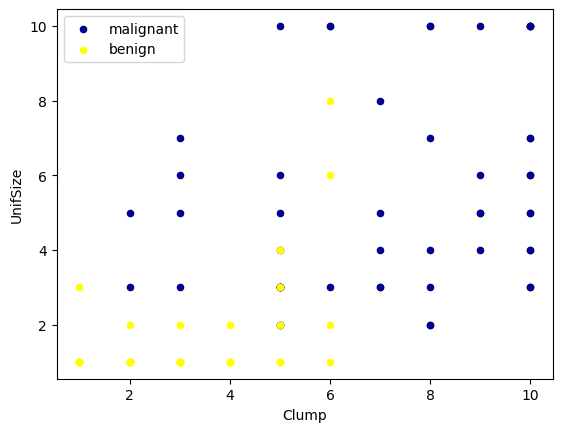

In [27]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize',
color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize',
color='Yellow', label='benign', ax=ax);
plt.show()

In [33]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [34]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

<ipython-input-34-df8bc795062c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [35]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh',
'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [36]:
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

In [37]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,
random_state=4)
print ('Trainset:', X_train.shape,y_train.shape)
print ('Testset:', X_test.shape,y_test.shape)

Trainset: (546, 9) (546,)
Testset: (137, 9) (137,)


In [38]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [39]:
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 4, 2, 4, 2])

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusionmatrix',
                          cmap=plt.cm.Blues):

#hisfunctionprintsandplotstheconfusionmatrix.
#Normalizationcanbeappliedbysetting`normalize=True`.

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalizedconfusionmatrix")
  else:
    print('Confusionmatrix,withoutnormalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('Truelabel')
  plt.xlabel('Predictedlabel')

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusionmatrix,withoutnormalization
[[85  5]
 [ 0 47]]


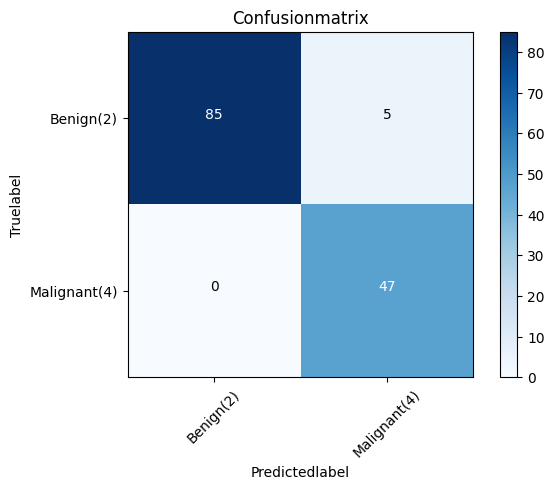

In [42]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)
print (classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],
                      normalize= False,title='Confusionmatrix')

In [43]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.9639038982104676

In [44]:
y_true = [2, 4, 2, 4, 2]
y_pred = [2, 4, 2, 2, 4]

jaccard = jaccard_score(y_true, y_pred, pos_label=2)
print(jaccard)

0.5


**Вывод:** в данной практической работе было проведено знакомство с методом  Support Vector Machines. Основная идея SVM заключается в поиске оптимальной разделяющей гиперплоскости (плоскость, которая делит n+1-ую плоскость), которая максимально разделяет классы данных. SVM строит гиперплоскость таким образом, чтобы расстояние от нее до ближайших точек каждого класса (называемых опорными векторами) было максимальным. В данной практической работе была разработана модель, которая классифицирует опухоли как доброкачественные/злокачественные. В результате оценки производительности был достишнут результат, в котором все злокачественные обухоли были верно предсказаны (47 объектов), а у доброкачествеенных из 85 верных и 5 неверно предсказанных. Главным преимуществом является эфективное использование в простанствах высокой размерности и хорошая обобщающая способность. Но эта модель важно, чтобы признаки были масштабированы, чтобы гиперплоскость, разделяющая классы, была определена корректно.